In [3]:
import pandas as pd
import numpy as np
import sklearn
import seaborn
from numpy import ravel
from numpy import unique
from numpy import transpose
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
seaborn.set(style="ticks")

In [4]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5JE66pQB1KJItYr2QUVldTeOGDUfgWwV8u5VdmGkkm6fjZgwCU0-owOzBFakl_aYfsF2aL6xNxRwc/pub?gid=161992597&single=true&output=csv"
colmns = ["name", "date", "freq_sum", "market", "t"]

data = pd.read_csv(url, usecols = colmns)
unique_items = data.loc[:, "name"].unique()


In [13]:
data.dtypes

name        object
date         int64
t            int64
freq_sum     int64
market       int64
dtype: object

In [15]:
cocoa = data[data.loc[:,"name"] == "Какао"]
gold = data[data.loc[:,"name"] == "Золото"]

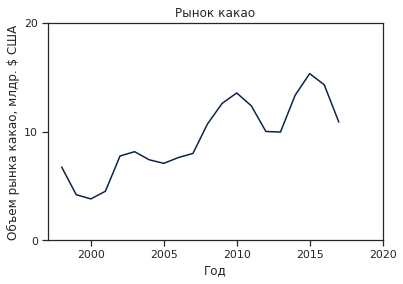

In [25]:
plt.plot(cocoa.date, cocoa.market, color = "#0b2247")
plt.xlabel("Год")
plt.ylabel("Объем рынка какао, млдр. $ США")
plt.title("Рынок какао")
values = [0, 1*10**10, 2*10**10]
labels = [0, 10, 20]
plt.yticks(values, labels)
plt.xticks([2000, 2005, 2010, 2015, 2020], [2000, 2005, 2010, 2015, 2020])
plt.show()

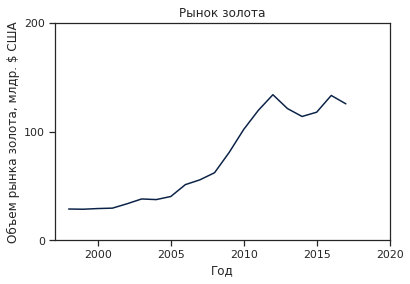

In [26]:
plt.plot(gold.date, gold.market, color = "#0b2247")
plt.xlabel("Год")
plt.ylabel("Объем рынка золота, млдр. $ США")
plt.title("Рынок золота")
values = [0, 1*10**11, 2*10**11]
labels = [0, 100, 200]
plt.yticks(values, labels)
plt.xticks([2000, 2005, 2010, 2015, 2020], [2000, 2005, 2010, 2015, 2020])
plt.show()

In [7]:
from scipy.stats.stats import pearsonr

In [8]:
unique_items = list(unique_items)

In [9]:
list_ = []
results = []
for item_name in unique_items:

    a = data[data["name"] == item_name].market
    b = data[data["name"] == item_name].freq_sum
    list_.append(pearsonr(a, b)[0])
    results.append({"Товар":item_name, "Коэффициент Пирсона":pearsonr(a, b)[0], "Значимость":pearsonr(a, b)[1]})
    if pearsonr(a, b)[1] < 0.05:
        print(f"{item_name} : {pearsonr(a, b)[0]:.3}, стат. значим, 95%")
    else:
        print(f"{item_name} : {pearsonr(a, b)[0]:.3}, стат. НЕ значим, 95%")
print("")
print(np.array(list_).mean())

Какао : 0.837, стат. значим, 95%
Кокосовое масло : 0.722, стат. значим, 95%
Арахис : 0.601, стат. значим, 95%
Арахисовое масло : 0.444, стат. значим, 95%
Пальмовое масло : 0.886, стат. значим, 95%
Соевые бобы : 0.909, стат. значим, 95%
Соевое масло : 0.847, стат. значим, 95%
Ячмень : 0.224, стат. НЕ значим, 95%
Маис : 0.814, стат. значим, 95%
Сорго : 0.697, стат. значим, 95%
Апельсин : 0.496, стат. значим, 95%
Говядина : 0.964, стат. значим, 95%
Хлопок : 0.695, стат. значим, 95%
Алюминий : 0.818, стат. значим, 95%
Медь : 0.816, стат. значим, 95%
Свинец : 0.691, стат. значим, 95%
Олово : 0.907, стат. значим, 95%
Никель : 0.529, стат. значим, 95%
Цинк : 0.649, стат. значим, 95%
Золото : 0.946, стат. значим, 95%
Платина : 0.446, стат. значим, 95%
Серебро : 0.783, стат. значим, 95%
Сырая нефть : 0.423, стат. НЕ значим, 95%

0.7019548556145571


In [85]:
correlations = pd.DataFrame(results)[['Товар', 'Коэффициент Пирсона', 'Значимость']]
correlations.to_csv("corr_market.csv")


In [89]:
correlations

,Товар,Коэффициент Пирсона,Значимость
0,Какао,0.836962,4.209090e-06
1,Кокосовое масло,0.722088,3.244548e-04
2,Арахис,0.601116,5.058905e-03
3,Арахисовое масло,0.444177,4.976131e-02
4,Пальмовое масло,0.886382,1.970541e-07
5,Соевые бобы,0.908999,2.910281e-08
6,Соевое масло,0.846835,2.491952e-06
7,Ячмень,0.224167,3.420512e-01
8,Маис,0.814481,1.233674e-05
9,Сорго,0.696756,6.414306e-04


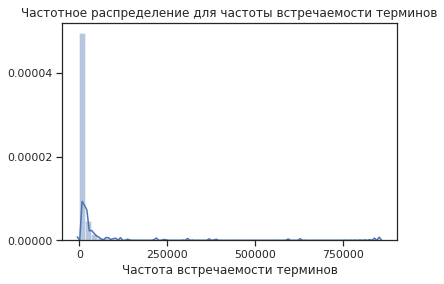

In [11]:
plt.locator_params(nbins=4)
seaborn.distplot(data.freq_sum).ticklabel_format(axis = 'x',style = "plain")
name = "Частотное распределение для частоты встречаемости терминов"
plt.title(name)
plt.xlabel("Частота встречаемости терминов")
plt.ylabel("")
plt.savefig(name)
plt.show()

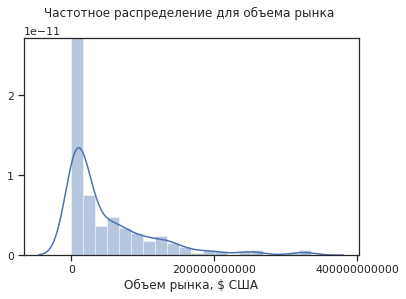

In [12]:
plt.locator_params(nbins=3)
plot = seaborn.distplot(data.market).ticklabel_format(axis = 'x',style = "plain")
name = "Частотное распределение для объема рынка \n"
plt.title(name)
# plt.xticks(rotation='vertical')
plt.xlabel("Объем рынка, $ США")
plt.ylabel("")
# plt.show()
plt.savefig(name)

In [13]:
data['freq_sum_log10'] = np.log10(data['freq_sum'])
data['market_log10'] = np.log10(data['market'])

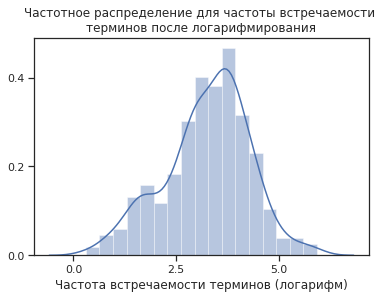

In [81]:
plt.locator_params(nbins=4)
seaborn.distplot(data.freq_sum_log10).ticklabel_format(axis = 'x',style = "plain")
name = "Частотное распределение для частоты встречаемости \nтерминов после логарифмирования"
plt.title(name)
plt.xlabel("Частота встречаемости терминов (логарифм)")
plt.ylabel("")
plt.savefig(name)
plt.show()

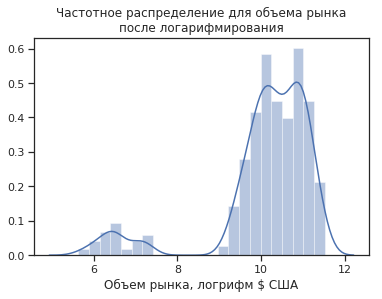

In [83]:
plt.locator_params(nbins=8)
plot = seaborn.distplot(data.market_log10).ticklabel_format(axis = 'x',style = "plain")
name = "Частотное распределение для объема рынка\nпосле логарифмирования"
plt.title(name)
# plt.xticks(rotation='vertical')
plt.xlabel("Объем рынка, логрифм $ США")
plt.ylabel("")
# plt.show()
plt.savefig(name)

In [16]:
data[data.market_log10 < 8].name.unique()

array(['Серебро', 'Сырая нефть'], dtype=object)

<b> Серебро </b>, <b>Нефть </b> - рынки, которые сильно отличаются после логарифмирования, у них другое распределение, которое четко разделимо на графике

In [17]:
data_ = data[(data.loc[:, "name"] != 'Серебро') & (data.loc[:, "name"] != 'Сырая нефть')]

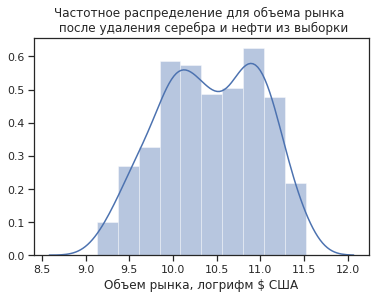

In [84]:
plt.locator_params(nbins=8)
plot = seaborn.distplot(data_.market_log10).ticklabel_format(axis = 'x',style = "plain")
name = "Частотное распределение для объема рынка \n после удаления серебра и нефти из выборки"
plt.title(name)
# plt.xticks(rotation='vertical')
plt.xlabel("Объем рынка, логрифм $ США")
plt.ylabel("")
# plt.show()
plt.savefig(name)

In [92]:
data_.corr()

,date,t,freq_sum,market,freq_sum_log10,market_log10
date,1.000000,1.000000,0.187099,0.273187,0.391060,0.277202
t,1.000000,1.000000,0.187099,0.273187,0.391060,0.277202
freq_sum,0.187099,0.187099,1.000000,-0.036697,0.444704,0.004620
market,0.273187,0.273187,-0.036697,1.000000,0.291689,0.839270
freq_sum_log10,0.391060,0.391060,0.444704,0.291689,1.000000,0.347114
market_log10,0.277202,0.277202,0.004620,0.839270,0.347114,1.000000


In [19]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [20]:
mod = sm.OLS(data_.market_log10, data_.freq_sum_log10)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           market_log10   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     4300.
Date:                Mon, 30 Dec 2019   Prob (F-statistic):          1.93e-222
Time:                        02:03:47   Log-Likelihood:                -1072.8
No. Observations:                 420   AIC:                             2148.
Df Residuals:                     419   BIC:                             2152.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
freq_sum_log10     2.9622      0.045     65.

In [21]:
linear_regressor = LinearRegression(fit_intercept = True)
fitt = linear_regressor.fit(data_[['freq_sum_log10']], data_[['market_log10']])
Y_pred = linear_regressor.predict(data_[['freq_sum_log10']])
linear_regressor.score(data_[['freq_sum_log10']], data_[['market_log10']])

0.12048816744764736

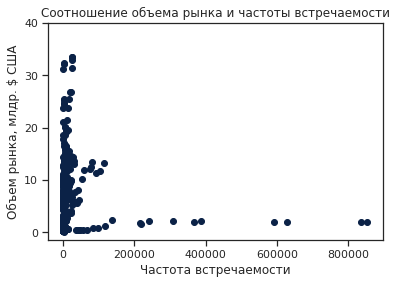

In [80]:
plt.scatter(data_[['freq_sum']], data_[['market']], color = "#0b2247")
plt.xlabel("Частота встречаемости")
plt.ylabel("Объем рынка, млдр. $ США")
plt.title("Соотношение объема рынка и частоты встречаемости")
values = [0, 1*10**11, 2*10**11, 3*10**11, 4*10**11]
labels = [0, 10, 20, 30, 40]
plt.yticks(values, labels)
plt.show()

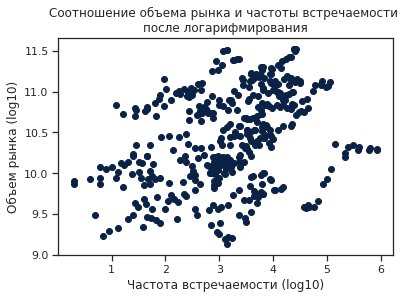

In [79]:
plt.scatter(data_[['freq_sum_log10']], data_[['market_log10']], color = "#0b2247")
plt.xlabel("Частота встречаемости (log10)")
plt.ylabel("Объем рынка (log10)")
plt.title("Соотношение объема рынка и частоты встречаемости \nпосле логарифмирования")
plt.show()

In [23]:
# data_

In [24]:
unique_items = data_.loc[:, "name"].unique()

In [25]:
# # data from https://docs.google.com/spreadsheets/d/1DKLCvav8efbkB8-6lJtDINDJwKWUcOg1yHUd6YLlRS0/edit#gid=1805190093
# #  list data

# model__ = RandomForestRegressor(n_estimators=150, random_state=12)
# train = data_.copy(deep=True)
# # X_train, y_train = train.loc[:, ["freq_sum_log10", "t"]], train.loc[:, ["sum_volume_log10"]]
# # model__.fit(X_train, y_train)

# score_list = []



# for item in unique_items:
#     test = data_[data_.loc[:, "name"] == item]
#     X_test, y_test = test.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(test.loc[:, ["market_log10"]])
#     preds = []
#     for item_ in unique_items:      
#         train_ = data_[data_.loc[:, "name"] != item_]
#         X_train, y_train = train_.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(train_.loc[:, ["market_log10"]])
#         model__.fit(X_train, ravel(y_train)) #fit on train set, that contains all the obs except for item_
#         preds.append(model__.predict(X_test))
        
#     matrix__ = np.array(preds).transpose()
#     df_pred = pd.DataFrame(matrix__)
#     df_pred["prediction"] = df_pred.mean(axis = 1)
#     result_out2 = r2_score(y_test, df_pred["prediction"])
#     score_list.append(result_out2)
#     print("Для {} скор составляет {:.3}".format(item, result_out2))
# print("Средний скор для данных составляет {}".format(np.mean(score_list)))
    


# MODELS

# Linear resgression

In [26]:
model__ = LinearRegression(fit_intercept = True)
train = data_.copy(deep=True)

score_list = []

table_names = []
actuals = []
model_predicts = []


for item in unique_items:
    test = data_[data_.loc[:, "name"] == item]
    X_test, y_test = test.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(test.loc[:, ["market_log10"]])
    preds = []
    for item_ in unique_items:      
        train_ = data_[data_.loc[:, "name"] != item_]
        X_train, y_train = train_.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(train_.loc[:, ["market_log10"]])
        model__.fit(X_train, ravel(y_train)) #fit on train set, that contains all the obs except for item_
        preds.append(model__.predict(X_test))
        
    matrix__ = np.array(preds).transpose()
    df_pred = pd.DataFrame(matrix__)
    df_pred["prediction"] = df_pred.mean(axis = 1)
    y_test_unlogged = np.power(y_test, 10)
    y_pred_unlogged = np.power(df_pred["prediction"], 10)
    actuals.append(list(y_test_unlogged.market_log10))
    model_predicts.append(list(y_pred_unlogged))
#     result_out2 = r2_score(y_test, df_pred["prediction"])
    result_out2 = r2_score(y_test_unlogged, y_pred_unlogged)
    score_list.append(result_out2)
    print("Для {} скор составляет {:.3}".format(item, result_out2))
print("Средний скор для данных составляет {}".format(np.mean(score_list)))
    


Для Какао скор составляет -7.86
Для Кокосовое масло скор составляет -6.28
Для Арахис скор составляет -15.5
Для Арахисовое масло скор составляет -1.18
Для Пальмовое масло скор составляет -4.21
Для Соевые бобы скор составляет -5.22
Для Соевое масло скор составляет -0.67
Для Ячмень скор составляет -1.69
Для Маис скор составляет -9.11
Для Сорго скор составляет -7.43
Для Апельсин скор составляет -2.23
Для Говядина скор составляет -19.0
Для Хлопок скор составляет -8.15
Для Алюминий скор составляет -2.64
Для Медь скор составляет -0.907
Для Свинец скор составляет -9.63
Для Олово скор составляет -48.1
Для Никель скор составляет 0.139
Для Цинк скор составляет -0.348
Для Золото скор составляет 0.285
Для Платина скор составляет -32.7
Средний скор для данных составляет -8.688630816991502


In [27]:
actuals_new = []
for i in range(len(actuals)):
    actuals_new.append(actuals[i][-1])

In [28]:
model_predicts_new = []
for i in range(len(model_predicts)):
    model_predicts_new.append(model_predicts[i][-1])
    

In [29]:
R2 = r2_score(actuals_new, model_predicts_new)


In [30]:
MSE_linreg = mean_squared_error(actuals_new, model_predicts_new)

In [31]:
MSE_linreg

9.07542533827115e+19

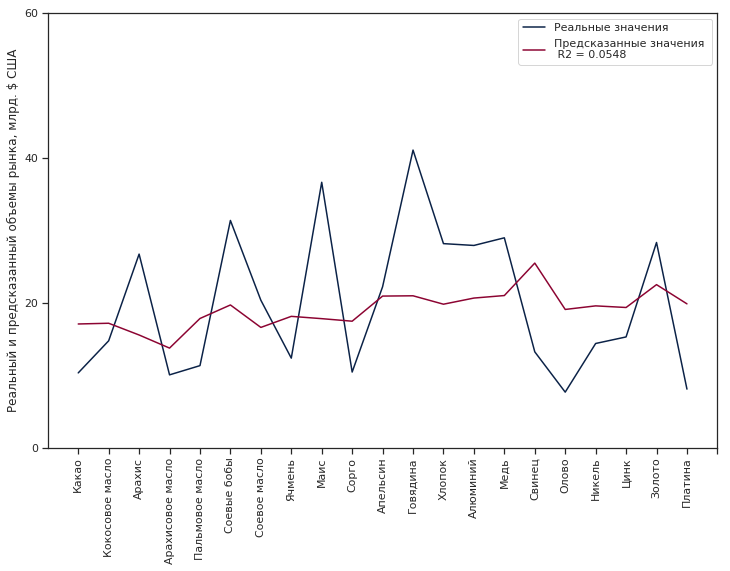

In [32]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
a = list(range(22))

plt.figure(figsize=(12, 8))
plot1, = plt.plot(actuals_new, color = "#0b2247")
plot2, = plt.plot(model_predicts_new, color = "#8c0432") #520821
plt.xticks(a, unique_items, rotation='vertical')
values = [0, 2*10**10, 4*10**10, 6*10**10]
labels = [0, 20, 40, 60]
plt.yticks(values, labels)
plt.ylabel("Реальный и предсказанный объемы рынка, млрд. $ США")
plt.legend([plot1, plot2], ["Реальные значения", f"Предсказанные значения \n R2 = {R2:.3}"])
plt.show()


# SVR

In [33]:
model__ = SVR(kernel='linear', verbose=False, C = 100, epsilon=0.01)
train = data_.copy(deep=True)

score_list = []

table_names = []
actuals = []
model_predicts = []


for item in unique_items:
    test = data_[data_.loc[:, "name"] == item]
    X_test, y_test = test.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(test.loc[:, ["market_log10"]])
    preds = []
    for item_ in unique_items:      
        train_ = data_[data_.loc[:, "name"] != item_]
        X_train, y_train = train_.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(train_.loc[:, ["market_log10"]])
        model__.fit(X_train, ravel(y_train)) #fit on train set, that contains all the obs except for item_
        preds.append(model__.predict(X_test))
        
    matrix__ = np.array(preds).transpose()
    df_pred = pd.DataFrame(matrix__)
    df_pred["prediction"] = df_pred.mean(axis = 1)
    y_test_unlogged = np.power(y_test, 10)
    y_pred_unlogged = np.power(df_pred["prediction"], 10)
    actuals.append(list(y_test_unlogged.market_log10))
    model_predicts.append(list(y_pred_unlogged))
#     result_out2 = r2_score(y_test, df_pred["prediction"])
    result_out2 = r2_score(y_test_unlogged, y_pred_unlogged)
    score_list.append(result_out2)
    print("Для {} скор составляет {:.3}".format(item, result_out2))
print("Средний скор для данных составляет {}".format(np.mean(score_list)))
    


Для Какао скор составляет -7.0
Для Кокосовое масло скор составляет -4.77
Для Арахис скор составляет -18.4
Для Арахисовое масло скор составляет -0.16
Для Пальмовое масло скор составляет -3.79
Для Соевые бобы скор составляет -4.71
Для Соевое масло скор составляет -1.1
Для Ячмень скор составляет -1.24
Для Маис скор составляет -9.2
Для Сорго скор составляет -5.51
Для Апельсин скор составляет -0.419
Для Говядина скор составляет -16.1
Для Хлопок скор составляет -6.59
Для Алюминий скор составляет -1.31
Для Медь скор составляет -0.412
Для Свинец скор составляет -18.7
Для Олово скор составляет -55.2
Для Никель скор составляет -0.172
Для Цинк скор составляет -0.778
Для Золото скор составляет 0.645
Для Платина скор составляет -39.5
Средний скор для данных составляет -9.253478825992232


In [34]:
actuals_new = []
for i in range(len(actuals)):
    actuals_new.append(actuals[i][-1])

In [35]:
model_predicts_new = []
for i in range(len(model_predicts)):
    model_predicts_new.append(model_predicts[i][-1])
    

In [36]:
R2 = r2_score(actuals_new, model_predicts_new)
R2

0.028223507514962165

In [37]:
MSE_SVR_lineal = mean_squared_error(actuals_new, model_predicts_new)

In [60]:
MSE_SVR_lineal

9.330761151896291e+19

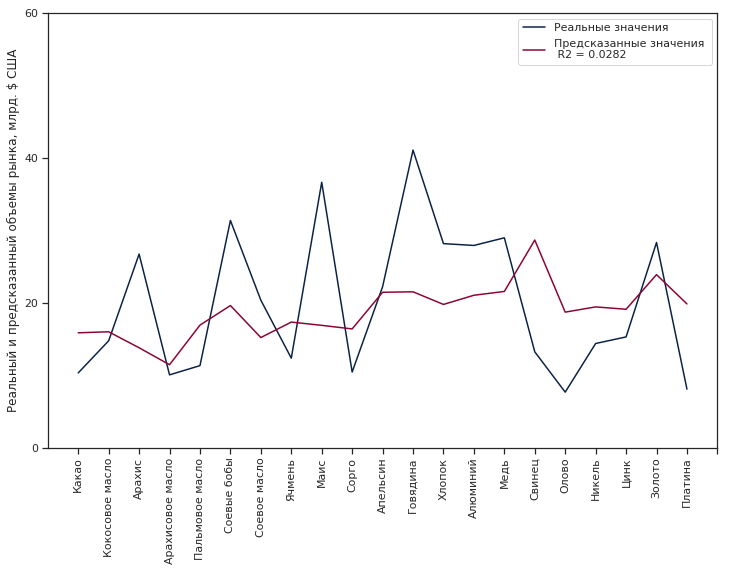

In [38]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
a = list(range(22))

plt.figure(figsize=(12, 8))
plot1, = plt.plot(actuals_new, color = "#0b2247")
plot2, = plt.plot(model_predicts_new, color = "#8c0432") #520821
plt.xticks(a, unique_items, rotation='vertical')
values = [0, 2*10**10, 4*10**10, 6*10**10]
labels = [0, 20, 40, 60]
plt.yticks(values, labels)
plt.ylabel("Реальный и предсказанный объемы рынка, млрд. $ США")
plt.legend([plot1, plot2], ["Реальные значения", f"Предсказанные значения \n R2 = {R2:.3}"])
plt.show()


## SVR nonlinear kernel

In [39]:
model__ = SVR(kernel='rbf', verbose=False, C = 100, epsilon=0.01)
train = data_.copy(deep=True)

score_list = []

table_names = []
actuals = []
model_predicts = []


for item in unique_items:
    test = data_[data_.loc[:, "name"] == item]
    X_test, y_test = test.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(test.loc[:, ["market_log10"]])
    preds = []
    for item_ in unique_items:      
        train_ = data_[data_.loc[:, "name"] != item_]
        X_train, y_train = train_.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(train_.loc[:, ["market_log10"]])
        model__.fit(X_train, ravel(y_train)) #fit on train set, that contains all the obs except for item_
        preds.append(model__.predict(X_test))
        
    matrix__ = np.array(preds).transpose()
    df_pred = pd.DataFrame(matrix__)
    df_pred["prediction"] = df_pred.mean(axis = 1)
    y_test_unlogged = np.power(y_test, 10)
    y_pred_unlogged = np.power(df_pred["prediction"], 10)
    actuals.append(list(y_test_unlogged.market_log10))
    model_predicts.append(list(y_pred_unlogged))
#     result_out2 = r2_score(y_test, df_pred["prediction"])
    result_out2 = r2_score(y_test_unlogged, y_pred_unlogged)
    score_list.append(result_out2)
    print("Для {} скор составляет {:.3}".format(item, result_out2))
print("Средний скор для данных составляет {}".format(np.mean(score_list)))

Для Какао скор составляет -3.51
Для Кокосовое масло скор составляет -6.51
Для Арахис скор составляет -8.87
Для Арахисовое масло скор составляет -2.16
Для Пальмовое масло скор составляет -0.482
Для Соевые бобы скор составляет -7.51
Для Соевое масло скор составляет -1.36
Для Ячмень скор составляет -1.16
Для Маис скор составляет -12.5
Для Сорго скор составляет -0.0805
Для Апельсин скор составляет -2.83
Для Говядина скор составляет -8.09
Для Хлопок скор составляет -8.99
Для Алюминий скор составляет 0.732
Для Медь скор составляет 0.883
Для Свинец скор составляет 0.944
Для Олово скор составляет -33.3
Для Никель скор составляет 0.405
Для Цинк скор составляет 0.969
Для Золото скор составляет 0.976
Для Платина скор составляет -37.7
Средний скор для данных составляет -6.196944830188913


In [40]:
actuals_new = []
for i in range(len(actuals)):
    actuals_new.append(actuals[i][-1])

In [41]:
model_predicts_new = []
for i in range(len(model_predicts)):
    model_predicts_new.append(model_predicts[i][-1])
    

In [42]:
R2 = r2_score(actuals_new, model_predicts_new)
R2

0.3654993557042816

In [43]:
MSE_SVR_rbf = mean_squared_error(actuals_new, model_predicts_new)

In [59]:
MSE_SVR_rbf

6.0923206194338054e+19

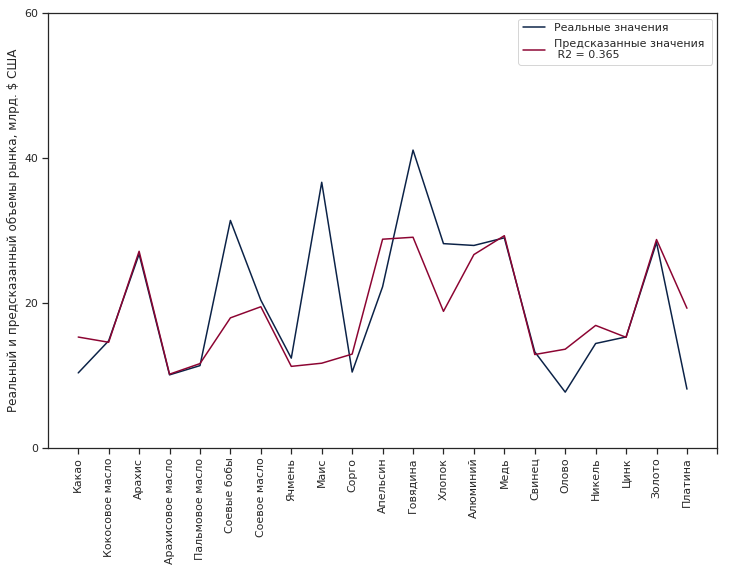

In [44]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
a = list(range(22))

plt.figure(figsize=(12, 8))
plot1, = plt.plot(actuals_new, color = "#0b2247")
plot2, = plt.plot(model_predicts_new, color = "#8c0432") #520821
plt.xticks(a, unique_items, rotation='vertical')
values = [0, 2*10**10, 4*10**10, 6*10**10]
labels = [0, 20, 40, 60]
plt.yticks(values, labels)
plt.ylabel("Реальный и предсказанный объемы рынка, млрд. $ США")
plt.legend([plot1, plot2], ["Реальные значения", f"Предсказанные значения \n R2 = {R2:.3}"])
plt.show()


# Random forest regressor

In [45]:
data_.head()

,name,date,t,freq_sum,market,freq_sum_log10,market_log10
0,Какао,1998,1,16,6737791560,1.204120,9.828518
1,Какао,1999,2,44,4195377450,1.643453,9.622771
2,Какао,2000,3,31,3805830720,1.491362,9.580449
3,Какао,2001,4,111,4511574200,2.045323,9.654328
4,Какао,2002,5,208,7750779400,2.318063,9.889345


In [46]:
model__ = RandomForestRegressor(n_estimators=250, random_state=12)
train = data_.copy(deep=True)
# X_train, y_train = train.loc[:, ["freq_sum_log10", "t"]], train.loc[:, ["sum_volume_log10"]]
# model__.fit(X_train, y_train)

score_list = []

table_names = []
actuals = []
model_predicts = []


for item in unique_items:
    test = data_[data_.loc[:, "name"] == item]
    X_test, y_test = test.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(test.loc[:, ["market_log10"]])
    preds = []
    for item_ in unique_items:      
        train_ = data_[data_.loc[:, "name"] != item_]
        X_train, y_train = train_.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(train_.loc[:, ["market_log10"]])
        model__.fit(X_train, ravel(y_train)) #fit on train set, that contains all the obs except for item_
        preds.append(model__.predict(X_test))
        
    matrix__ = np.array(preds).transpose()
    df_pred = pd.DataFrame(matrix__)
    df_pred["prediction"] = df_pred.mean(axis = 1)
    y_test_unlogged = np.power(y_test, 10)
    y_pred_unlogged = np.power(df_pred["prediction"], 10)
    actuals.append(list(y_test_unlogged.market_log10))
    model_predicts.append(list(y_pred_unlogged))
#     result_out2 = r2_score(y_test, df_pred["prediction"])
    result_out2 = r2_score(y_test_unlogged, y_pred_unlogged)
    score_list.append(result_out2)
    print("Для {} скор составляет {:.3}".format(item, result_out2))
print("Средний скор для данных составляет {}".format(np.mean(score_list)))
    


Для Какао скор составляет -1.33
Для Кокосовое масло скор составляет 0.177
Для Арахис скор составляет -3.18
Для Арахисовое масло скор составляет 0.255
Для Пальмовое масло скор составляет -0.316
Для Соевые бобы скор составляет -1.58
Для Соевое масло скор составляет 0.442
Для Ячмень скор составляет -0.12
Для Маис скор составляет -2.12
Для Сорго скор составляет -0.285
Для Апельсин скор составляет -0.0333
Для Говядина скор составляет -0.903
Для Хлопок скор составляет -2.94
Для Алюминий скор составляет 0.643
Для Медь скор составляет 0.907
Для Свинец скор составляет 0.938
Для Олово скор составляет -3.29
Для Никель скор составляет 0.727
Для Цинк скор составляет 0.563
Для Золото скор составляет 0.927
Для Платина скор составляет -3.47
Средний скор для данных составляет -0.666062358498492


In [47]:
actuals_new = []
for i in range(len(actuals)):
    actuals_new.append(actuals[i][-1])

In [48]:
model_predicts_new = []
for i in range(len(model_predicts)):
    model_predicts_new.append(model_predicts[i][-1])
    

In [49]:
R2 = r2_score(actuals_new, model_predicts_new)
R2

0.8193293907128003

In [58]:
MSE_RFR = mean_squared_error(actuals_new, model_predicts_new)
MSE_RFR

1.734755178236e+19

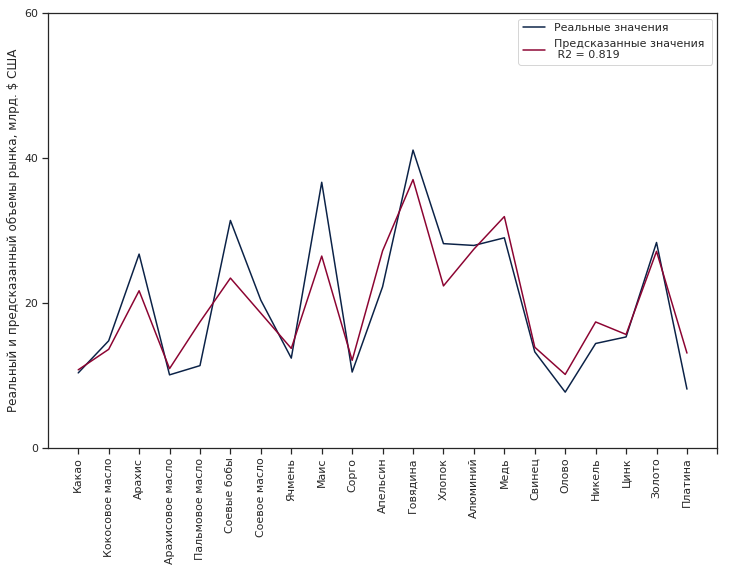

In [51]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
a = list(range(22))

plt.figure(figsize=(12, 8))
plot1, = plt.plot(actuals_new, color = "#0b2247")
plot2, = plt.plot(model_predicts_new, color = "#8c0432") #520821
plt.xticks(a, unique_items, rotation='vertical')
values = [0, 2*10**10, 4*10**10, 6*10**10]
labels = [0, 20, 40, 60]
plt.yticks(values, labels)
plt.ylabel("Реальный и предсказанный объемы рынка, млрд. $ США")
plt.legend([plot1, plot2], ["Реальные значения", f"Предсказанные значения \n R2 = {R2:.3}"])
plt.show()


# Term similarity data

In [ ]:
model__ = RandomForestRegressor(n_estimators=250, random_state=12)
train = data_.copy(deep=True)
# X_train, y_train = train.loc[:, ["freq_sum_log10", "t"]], train.loc[:, ["sum_volume_log10"]]
# model__.fit(X_train, y_train)

score_list = []

table_names = []
actuals = []
model_predicts = []


for item in unique_items:
    
    length_out = len(logged_data[logged_data.loc[:, "name"] == item].name)
    
    

    """Get data from microservice"""
    for term in unique_items:
        for opposite_term in unique_items:
            if term == opposite_term:
                continue
            try:
                url = f"http://api.ifora.hse.ru/vector_space/v0.2/w2v_2019_02_18/{term}/similarity/{opposite_term}"
                r = requests.get(url=url)
                data = r.json()
                results.append({"term": term, "opposite_term": opposite_term, "similarity": data["data"]["similarity"]}
            except Exception:
                pass

    
    similarity = []
    for i in range(len(results)):
        if results[i].get("term") == item:
            value_array = [results[i].get("similarity")]
            similarity.append({"term":results[i].get("opposite_term"), "val":value_array})
    
    """Get ordered results"""
    ordered_results = []
    for name in unique_items:
        for i in range(len(similarity)):
            dict_use = similarity[i]
            if dict_use.get("term") == name:
                ordered_results.append(dict_use.get("val"))
    
    """Get values vector"""
    value_vec = []
    i = 0
    for name in unique_items:
        value_vec.extend(ordered_results[i]*length_out)
        i +=1
    print(value_vec)
    

    

    """Model data def"""
    logged_data_sim = logged_data.copy(deep = True)
    logged_data_sim["similarity"] = value_vec # add a columns with similarity data for term
    test = logged_data_sim[logged_data_sim.loc[:, "name"] == item]
    X_test, y_test = test.loc[:, ["freq_sum_log10", "t", "similarity"]], pd.DataFrame(test.loc[:, ["market_log10"]])
    preds = []

    for item_ in unique_items:      
        train_ = data_[data_.loc[:, "name"] != item_]
        X_train, y_train = train_.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(train_.loc[:, ["market_log10"]])
        model__.fit(X_train, ravel(y_train)) #fit on train set, that contains all the obs except for item_
        preds.append(model__.predict(X_test))
        
    matrix__ = np.array(preds).transpose()
    df_pred = pd.DataFrame(matrix__)
    df_pred["prediction"] = df_pred.mean(axis = 1)
    y_test_unlogged = np.power(y_test, 10)
    y_pred_unlogged = np.power(df_pred["prediction"], 10)
    actuals.append(list(y_test_unlogged.market_log10))
    model_predicts.append(list(y_pred_unlogged))
#     result_out2 = r2_score(y_test, df_pred["prediction"])
    result_out2 = r2_score(y_test_unlogged, y_pred_unlogged)
    score_list.append(result_out2)
    print("Для {} скор составляет {:.3}".format(item, result_out2))
print("Средний скор для данных составляет {}".format(np.mean(score_list)))
    


In [ ]:
actuals_new_sim = []
for i in range(len(actuals)):
    actuals_new_sim.append(actuals[i][-1])

model_predicts_new_sim = []
for i in range(len(model_predicts)):
    model_predicts_new_sim.append(model_predicts[i][-1])

In [ ]:
r2score_sim = r2_score(actuals_new, model_predicts_new)
r2score_sim

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
a = list(range(26))

plt.figure(figsize=(12, 8))
plot1, = plt.plot(actuals_new_sim, color = "#0b2247")
plot2, = plt.plot(model_predicts_new_sim, color = "#8c0432") #520821
plt.xticks(a, unique_items, rotation='vertical')
plt.legend([plot1, plot2], ["Реальные значения", f"Предсказанные значения \n R2 = {r2score_sim:.3}"])
plt.show()

# Averaging (lowers score)

In [52]:
# model1 = RandomForestRegressor(n_estimators=250, random_state=12)
# model2 = SVR(kernel='rbf', verbose=False, C = 100, epsilon=0.01)
# train = data_.copy(deep=True)
# # X_train, y_train = train.loc[:, ["freq_sum_log10", "t"]], train.loc[:, ["sum_volume_log10"]]
# # model__.fit(X_train, y_train)

# score_list = []

# table_names = []
# actuals = []
# model_predicts = []


# for item in unique_items:
#     test = data_[data_.loc[:, "name"] == item]
#     X_test, y_test = test.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(test.loc[:, ["market_log10"]])
#     preds = []
#     for item_ in unique_items:      
#         train_ = data_[data_.loc[:, "name"] != item_]
#         X_train, y_train = train_.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(train_.loc[:, ["market_log10"]])
#         model1.fit(X_train, ravel(y_train))
#         model2.fit(X_train, ravel(y_train))
#         pred1 = model1.predict(X_test)
#         pred2 = model2.predict(X_test)
#         av_pred = (pred1+pred2)/2
#         preds.append(av_pred)
        
#     matrix__ = np.array(preds).transpose()
#     df_pred = pd.DataFrame(matrix__)
#     df_pred["prediction"] = df_pred.mean(axis = 1)
#     y_test_unlogged = np.power(y_test, 10)
#     y_pred_unlogged = np.power(df_pred["prediction"], 10)
#     actuals.append(list(y_test_unlogged.market_log10))
#     model_predicts.append(list(y_pred_unlogged))
# #     result_out2 = r2_score(y_test, df_pred["prediction"])
#     result_out2 = r2_score(y_test_unlogged, y_pred_unlogged)
#     score_list.append(result_out2)
#     print("Для {} скор составляет {:.3}".format(item, result_out2))
# print("Средний скор для данных составляет {}".format(np.mean(score_list)))
    


In [53]:
# actuals_new = []
# for i in range(len(actuals)):
#     actuals_new.append(actuals[i][-1])

In [54]:
# model_predicts_new = []
# for i in range(len(model_predicts)):
#     model_predicts_new.append(model_predicts[i][-1])
    

In [55]:
# R2 = r2_score(actuals_new, model_predicts_new)
# R2

In [56]:
# MSE_RFR = mean_squared_error(actuals_new, model_predicts_new)

In [57]:
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# a = list(range(22))

# plt.figure(figsize=(12, 8))
# plot1, = plt.plot(actuals_new, color = "#0b2247")
# plot2, = plt.plot(model_predicts_new, color = "#8c0432") #520821
# plt.xticks(a, unique_items, rotation='vertical')
# values = [0, 2*10**10, 4*10**10, 6*10**10]
# labels = [0, 20, 40, 60, 80]
# plt.yticks(values, labels)
# plt.ylabel("Реальный и предсказанный объемы рынка, млрд. $ США")
# plt.legend([plot1, plot2], ["Реальные значения", f"Предсказанные значения \n R2 = {R2:.3}"])
# plt.show()
